# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.276656e+01     1.363996e+01
 * time: 0.0041790008544921875
     1     6.110933e+01     7.840505e+00
 * time: 0.012562990188598633
     2     5.640817e+01     1.095261e+01
 * time: 0.03183794021606445
     3     3.833783e+01     7.312403e+00
 * time: 0.05757498741149902
     4     2.590809e+01     6.149678e+00
 * time: 0.08233189582824707
     5     1.497981e+01     2.578418e+00
 * time: 0.10322880744934082
     6     1.380252e+01     5.110712e+00
 * time: 0.11644387245178223
     7     1.104440e+01     4.424868e+00
 * time: 0.13329195976257324
     8     9.129697e+00     7.544742e+00
 * time: 0.15000295639038086
     9     7.315979e+00     2.307307e+00
 * time: 0.1700429916381836
    10     7.083546e+00     4.472234e+00
 * time: 0.26700782775878906
    11     6.574315e+00     2.908850e+00
 * time: 0.28266286849975586
    12     6.282120e+00     2.212924e+00
 * time: 0.2983548641204834
    13     6.125531e+00     1.886631e+00
 * time

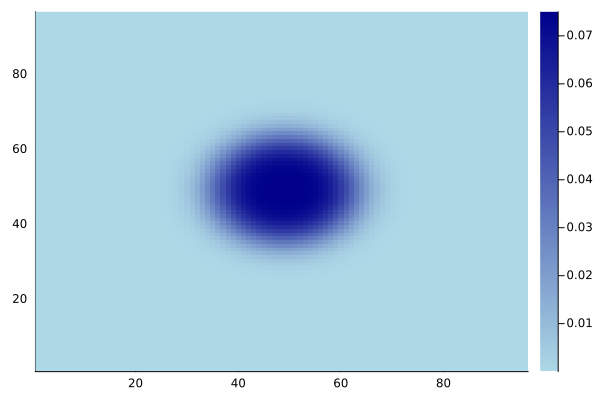

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)